# <span style="color:orange"> Projeto 01 - Análise de Concessão de cartões de crédito </span>
<span style="color:gray"> Este projeto é o resultado final da primeira parte do treinamento em Ciência de Dados, cujo objetivo e definir a melhor variável que responda se o crédito deve ou não ser liberado.</span>

<span style="color:gray"> O método desenvolvido foi baseado no **CRISP**.</span>



## <span style="color:orange"> Índice</span><a name="Contents"></a>
1. [Etapa 1 CRISP - DM: Entendimento do negócio](#etapa1)
2. [Etapa 2 Crisp-DM: Entendimento dos dados](#etapa2)
3. [Etapa 3 Crisp-DM: Preparação dos dados](#etapa3)
4. [Etapa 4 Crisp-DM: Modelagem](#etapa4)
5. [Etapa 5 Crisp-DM: Avaliação dos resultados](#etapa5)
6. [Etapa 6 Crisp-DM: Implantação](#etapa6)



## <span style="color:orange">Etapa 1 CRISP - DM: Entendimento do negócio</span><a name="etapa1"></a>

<span style="color:gray">**Fonte da base:** Este é um problema de concessão de cartões de crédito, publicado no [Kaggle](https://www.kaggle.com/), uma plataforma que promove desafios de ciência de dados, oferecendo prêmios em dinheiro para os melhores colocados. O link original está [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).</span> 
  
<span style="color:gray">Essa é uma base de proponentes de cartão de crédito, nosso objetivo é construir um modelo preditivo para identificar o risco de inadimplência (tipicamente definida pela ocorrência de um atraso maior ou igual a 90 em um horizonte de 12 meses) através de variáveis que podem ser observadas na data da avaliação do crédito (tipicamente quando o cliente solicita o cartão).</span>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

## <span style="color:orange"> Etapa 2 Crisp-DM: Entendimento dos dados</span><a name="etapa2"></a>
<span style="color:gray">A segunda etapa é o entendimento dos dados. Foram fornecidas 15 variáveis mais a variável resposta (em negrito na tabela). O significado de cada uma dessas variáveis se encontra na tabela.

#### <span style="color:gray">Dicionário de dados

<span style="color:gray">Os dados estão dispostos em uma tabela com uma linha para cada cliente, e uma coluna para cada variável armazenando as características desses clientes. Colocamos uma cópia o dicionário de dados (explicação dessas variáveis) abaixo neste notebook:

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

#### <span style="color:gray"> Carregando os pacotes


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#### <span style="color:gray">Carregando os dados


In [2]:
df = pd.read_csv('demo01.csv')
print ("Número de linhas e colunas da tabela: {}".format(df.shape))

df.head()

Número de linhas e colunas da tabela: (16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
# Eliminando linhas duplicadas
df = df.drop_duplicates()
df.shape

(6770, 16)

In [4]:
# Reindexando pós limpeza
df.reset_index(drop=True, inplace=True)
df.tail()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
6765,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
6766,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
6767,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
6768,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True
6769,F,N,Y,0,Pensioner,Higher education,Married,House / apartment,33.936986,3.630137,1,0,1,1,2.0,True


In [5]:
# Verificando se há missings / A BASE NÃO APRESENTOU MISSING
df.isna().sum() 

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

### <span style="color:gray">Entendimento dos dados - Univariada
<span style="color:gray">Analisando a distribuição de todas as variáveis. Nesta demonstração vamos ver a variável resposta e dois exemplos de univariada apenas.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### <span style="color:gray">Análise 01 - gráfico de barras</span>


In [6]:
# Variável default 'mau'

print(df['mau'].value_counts())
perc_mau = df['mau'].mean()
print(f'\nTaxa de inadimplentes:{perc_mau: .3f}%')

False    6472
True      298
Name: mau, dtype: int64

Taxa de inadimplentes: 0.044%


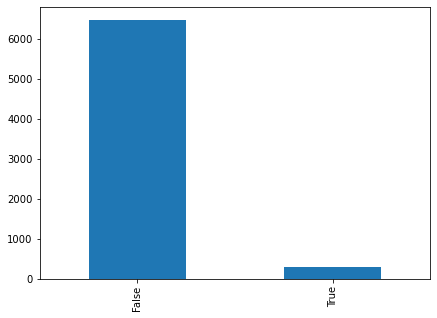

In [7]:
plt.close('all')
plt.rc('figure', figsize=(7, 5))
var = 'mau'
grafico_barras = df[var].value_counts().plot.bar()

[Text(0, 0, 'Working'),
 Text(1, 0, 'Commercial associate'),
 Text(2, 0, 'State servant'),
 Text(3, 0, 'Pensioner'),
 Text(4, 0, 'Student')]

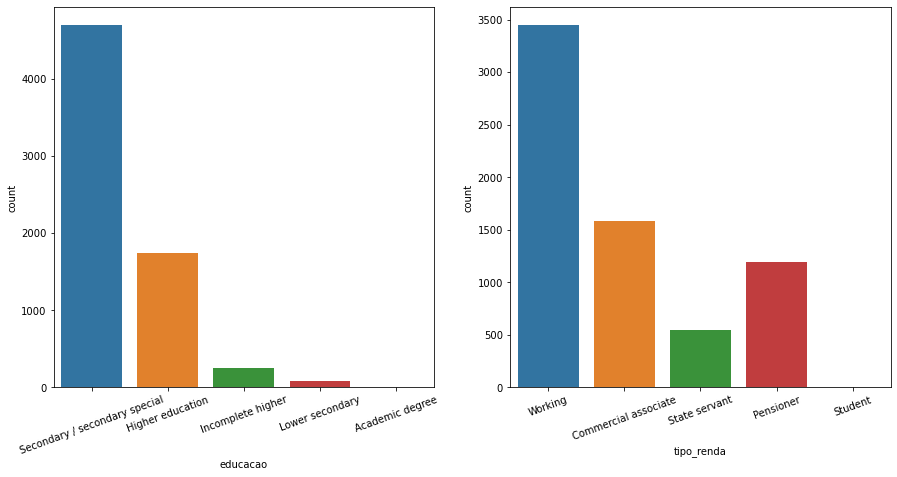

In [8]:
plt.close('all')
plt.rc('figure', figsize=(15, 7))
fig, axes = plt.subplots(1, 2)

educa_plot = sns.countplot(ax = axes[0], x='educacao', data=df)
educa_plot.set_xticklabels(educa_plot.get_xticklabels(), rotation=20)

renda_plot = sns.countplot(ax = axes[1], x='tipo_renda', data=df)
renda_plot.set_xticklabels(renda_plot.get_xticklabels(), rotation=20)


### <span style="color:gray">Análise 02 - Histograma </span>


<Figure size 1080x504 with 0 Axes>

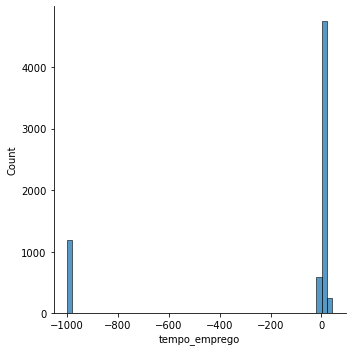

In [9]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

In [10]:
# Alterando valores de -1000 pra -2, para visualizar melhor no gráfico. Algum provável erro no preenchimento destes campos
var = "tempo_emprego"
df.loc[df[var]<0,var] = -2

<Figure size 1080x504 with 0 Axes>

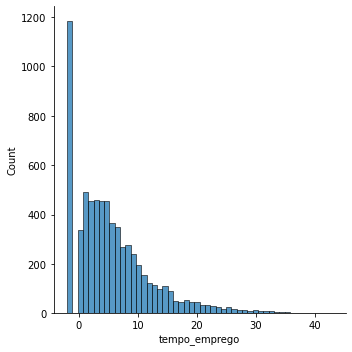

In [34]:
plt.clf()
var = "tempo_emprego"

sns.displot(df, x = var, bins = 50)
plt.show()

<Figure size 1080x504 with 0 Axes>

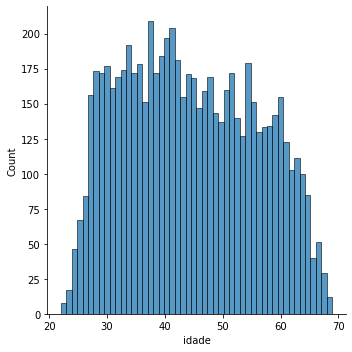

In [11]:
plt.clf()
var = "idade"

sns.displot(df, x = var, bins = 50)
plt.show()

### <span style="color:gray">Entendimento dos dados - Bivariadas

<span style="color:gray">Vamos calcular a taxa de inadimplentes (qtd inadimplentes / total) para diferentes grupos definidos pelas variáveis explicativas.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

### <span style="color:gray">Análise 1 - Bivariada </span>
<span style="color:gray"> Gráfico de linha mostrando o agrupamento em 5 quebras da variáve ```idade```. Em seguida a mesma análise para a variável ```tempo_emprego```. </span>



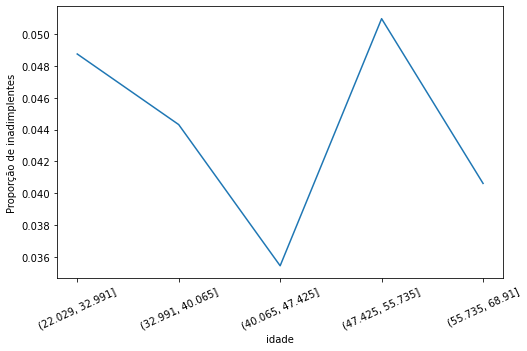

In [12]:
plt.close('all')
plt.rc('figure', figsize=(8, 5))

var = 'idade'
cat_srs, bins = pd.qcut(df[var], 5, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 25)

<span style="color:gray">A análise pela variável 'idade' mostra de forma bem mais destacada duas faixas de idade: clientes com até 32 anos de idade e clientes entre 47 e 55 anos de idade tem maior risco de inadimplência.

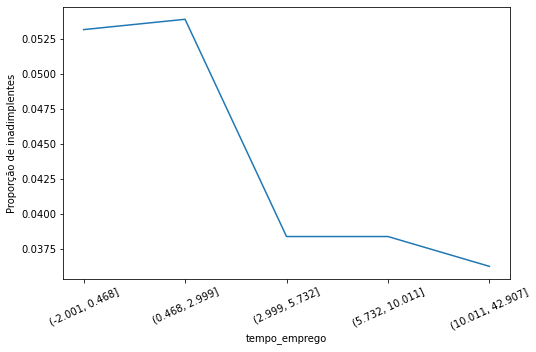

In [13]:
var = 'tempo_emprego'
cat_srs, bins = pd.qcut(df[var], 5, retbins=True)
g = df.groupby(cat_srs)
biv = g['mau'].mean()

ax = biv.plot.line()
ax.set_ylabel("Proporção de inadimplentes")
ticks = plt.xticks(range(len(biv.index.values)), biv.index.values, rotation = 25)

<span style="color:gray">A análise pela variável 'tempo_emprego' mostra de forma bem acentuada um maior risco de inadimplência para aquele grupo de clientes com menos tempo de emprego. Cliente com até 3 anos de emprego mostram um risco maior de inadimplência do que os clientes com mais de 3 anos de emprego.

## <span style="color:orange">Etapa 3 Crisp-DM: Preparação dos dados<a name="etapa3"></a>
<span style="color:gray">Nessa etapa realizamos tipicamente as seguintes operações com os dados:
- seleção:
Neste caso, os dados já estão pré-selecionados
- limpeza:
Precisaremos identificar e tratar dados faltantes (concluído no item anterior)
- construção:
Neste primeiro exercício não faremos construção de novas variáveis
- integração:
Temos apenas uma fonte de dados, não é necessário agregação
- formatação:
Os dados já se encontram em formatos úteis

<span style="color:gray">Os dados já estão pré-selecionados, construídos e integrados, mas há dados faltantes que serão eliminados na próxima célula

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [14]:
metadata = pd.DataFrame(df.dtypes, columns = ['tipo'])

metadata['n_categorias'] = 0

for var in metadata.index:
    metadata.loc[var,'n_categorias'] = len(df.groupby([var]).size())
    
metadata

,tipo,n_categorias
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298
tempo_emprego,float64,3005


### <span style="color:gray">Dummies </span>

In [15]:
df.sexo = df.sexo.map({'F': 1, 'M':0})
df.posse_de_veiculo = df.posse_de_veiculo.map({'Y': 1, 'N':0})
df.posse_de_imovel = df.posse_de_imovel.map({'Y': 1, 'N':0})

In [16]:
df = pd.get_dummies(df, columns=['tipo_renda','educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    6770 non-null   int64  
 1   posse_de_veiculo                        6770 non-null   int64  
 2   posse_de_imovel                         6770 non-null   int64  
 3   qtd_filhos                              6770 non-null   int64  
 4   idade                                   6770 non-null   float64
 5   tempo_emprego                           6770 non-null   float64
 6   possui_celular                          6770 non-null   int64  
 7   possui_fone_comercial                   6770 non-null   int64  
 8   possui_fone                             6770 non-null   int64  
 9   possui_email                            6770 non-null   int64  
 10  qt_pessoas_residencia                   6770 non-null   floa

## <span style="color:orange">Etapa 4 Crisp-DM: Modelagem<a name="etapa4"></a>
    
<span style="color:gray">Nessa etapa que realizaremos a construção do modelo. Os passos são:
- Selecionar a técnica de modelagem:
Utilizaremos a técnica de floresta aleatória (**random forest**), pois é uma técnica bastante versátil e robusta que captura bem padrões complexos nos dados, relativamente fácil de se usar e que costuma produzir excelentes resultados para uma classificação como estas. Vamos ver esse algoritmo em detalhes mais adiante no curso, mas pense nele por enquanto como uma regra complexa baseada nas variáveis explicativas que classifica o indivíduo como inadimplente ou não. Mais adiante no curso vamos extrair mais dessa técnica.
- Desenho do teste:
Antes de rodar o modelo precisamos construir um desenho do teste que será realizado. Para desenvolver um modelo como este, é considerado uma boa prática dividir a base em duas, uma chamada ```treinamento```, onde o algoritmo 'aprende', e outra chamada ```teste```, onde o algoritmo é avaliado. Essa prática fornece uma métrica de avaliação mais fidedigna do algoritmo, falaremos mais detalhes em lições futuras.
- Avaliação do modelo:
Faremos a avaliação do nosso modelo através do percentual de acerto, avaliando a classificação do modelo (inadimplente e não inadimplente) e comparando com o estado real armazenado na variável resposta (```AtrasoRelevante2anos```). Esse percentual de acerto é frequentemente chamado de acurácia (**obs:** nunca usar assertividade... a**ss**ertivo não é aquele que a**c**erta, e sim "*adj.: em que o locutor declara algo, positivo ou negativo, do qual assume inteiramente a validade; declarativo*." a**C**ertivo está errado ;)
    
<div style="text-align: right"
     
[Voltar ao índice](#Contents)


#### Dividindo a base em treino e teste

In [18]:
y = df.mau
X = df.drop('mau',axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### <span style="color:gray">Rodando o modelo - Árvore 1
<span style="color:gray">A função RandomForestClassifier gera a estrutura da floresta aleatória, e o parâmetro ```n_estimator``` define o número de árvores na floresta. Normalmente a acurácia do modelo tende a aumentar com o número de árvores, pelo menos até um certo limite - e aumenta também o recurso computacional demandado. Você pode alterar esse parâmetro e verificar se a acurácia do seu modelo melhora - não recomendamos valores muito altos. Vá alterando aos poucos e percebendo como o tempo aumenta com os seus recursos. Não é necessário ir muito além de umas 100 árvores.

In [25]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=5)
clf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [33]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

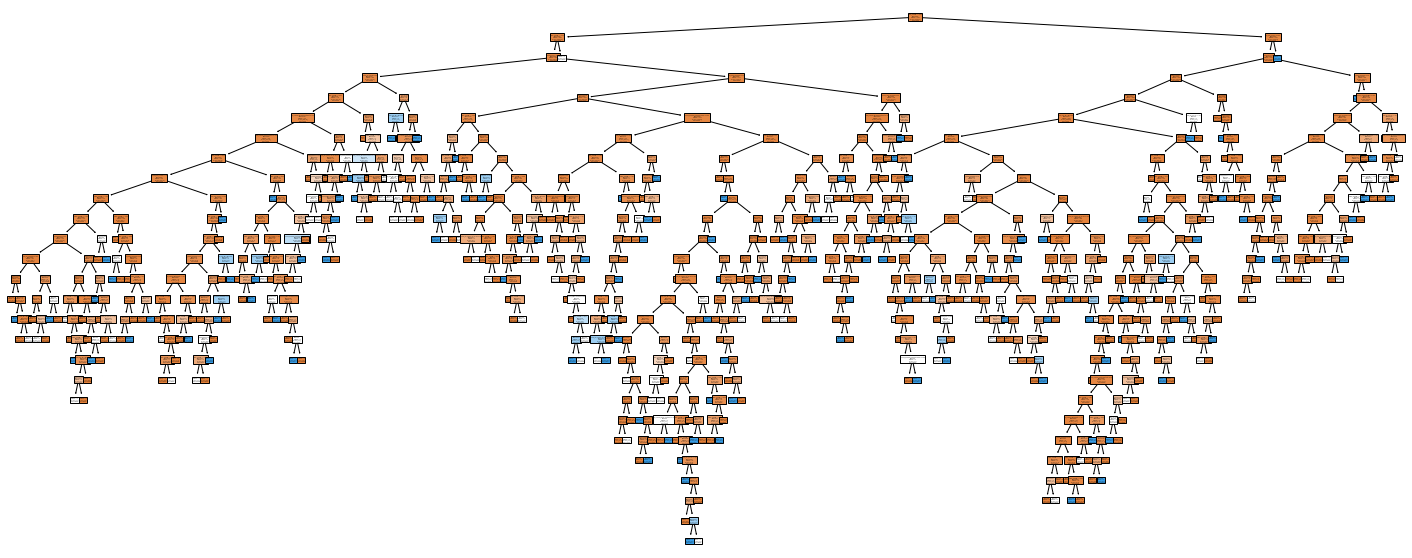

In [34]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['False', 'True'],
          feature_names=X.columns);

### <span style="color:gray">Acuracidade </span>
<span style="color:gray"> Aqui vamos calcular a acuracidade apurada na base treino e teste. </span>

#### <span style="color:gray">Acuracidade para treino Árvore 1

In [35]:
predict = clf.predict(X_train)

0.9852289512555391

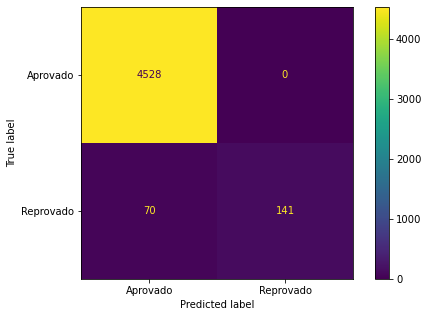

In [37]:
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado'])
accuracy_score(y_train, predict)

#### <span style="color:gray">Acuracidade para teste Árvore 1

In [38]:
clf = DecisionTreeClassifier(random_state=100)
clf_test = clf.fit(X_test,y_test)

0.9945839487936977

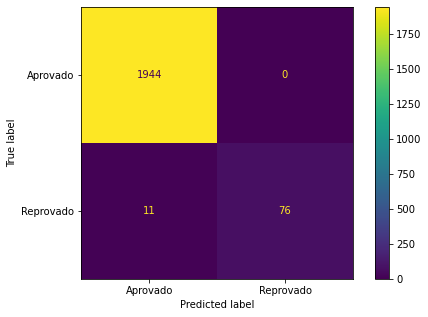

In [39]:
predict_test = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado'])
accuracy_score(y_test, predict_test)

### <span style="color:gray">Árvore 2 (pre-pruning): amostras mínimas de 5, profundida máxima 10

In [40]:
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=100)
clf = clf.fit(X_train,y_train)

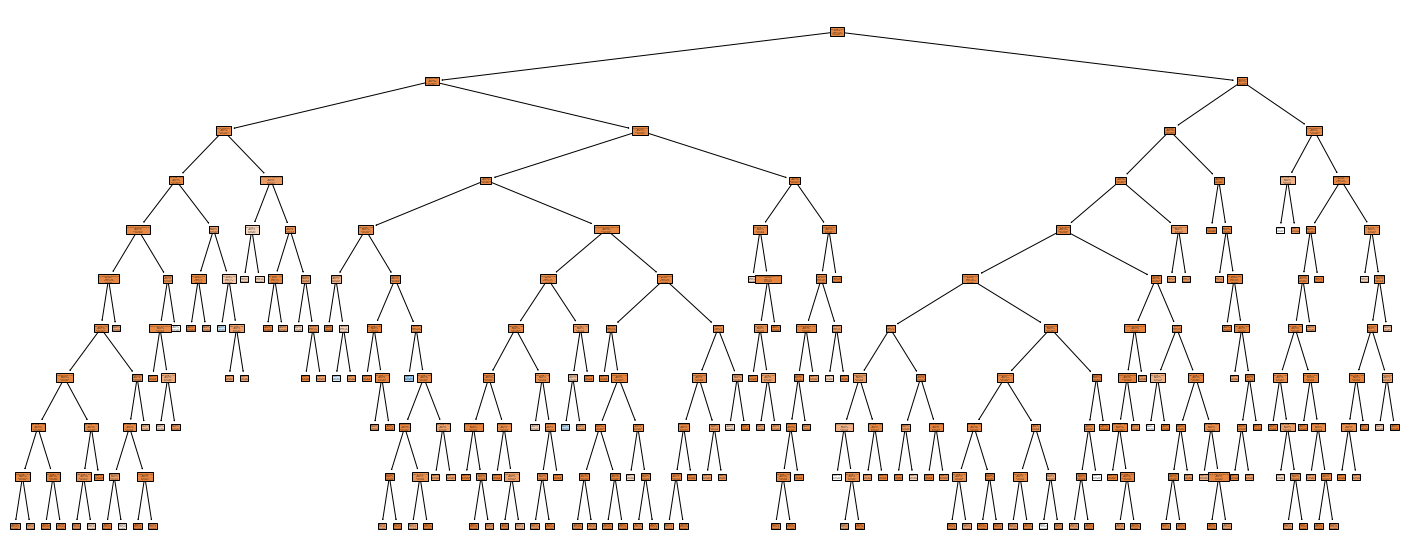

In [41]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['False', 'True'],
          feature_names=X.columns);

#### <span style="color:gray">Acuracidade para treino Árvore 2

0.9565309136948723

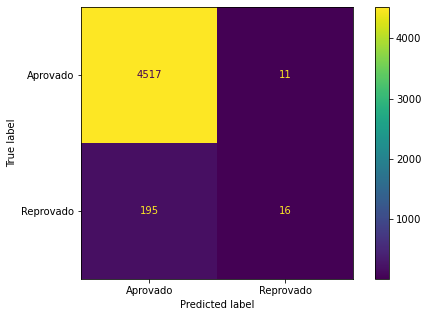

In [42]:
predict_2 = clf.predict(X_train)
plot_confusion_matrix(clf, X_train, y_train, display_labels=['Aprovado', 'Reprovado'])
accuracy_score(y_train, predict_2)

#### <span style="color:gray">Acuracidade para teste Árvore 2

0.9537173806006893

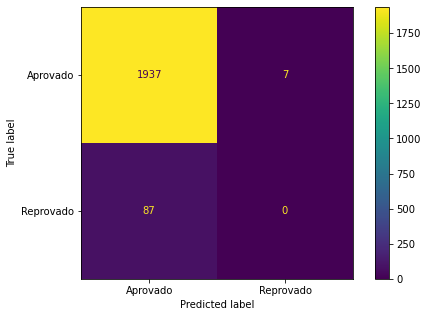

In [43]:
predict_test2 = clf.predict(X_test)
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovado', 'Reprovado'])
accuracy_score(y_test, predict_test2)

### <span style="color:gray">Análise após o pre-pruning

<span style="color:gray">Observamos que aplicando o pre-pruning a acuracidade no treino cai 2,9% e 4,1% no teste. Assim, consideramos o melhor modelo a árvore sem poda.

## <span style="color:orange">Etapa 5 Crisp-DM: Avaliação dos resultados<a name="etapa5"></a>
<span style="color:gray">A etapa final do CRISP. Neste caso, a nossa avaliação termina com a acurácia. Mas em problemas futuros aprofundaremos mais - a ideia seria avaliar o impacto do uso do modelo no negócio, ou seja, o quanto o resultado financeiro melhora em detrimento da utilização do modelo.

<span style="color:gray">Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

<span style="color:gray">De acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4528 x 5          | 70 x (-100)    | 15.640 |
| Reprovar  |  141 x 5          |  0 x (-100)    |   -705 |

<span style="color:gray">Estariamos evitando, portanto, um prejuízo de -14.935 '*dinheiros*' - o que na prática significa um aumento no lucro.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

## <span style="color:orange">Etapa 6 Crisp-DM: Implantação<a name="etapa6"></a>
<span style="color:gray">Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor de crédito que toma as decisões com algum nível de automação - tipicamente aprovando automaticamente clientes muito bons, negando automaticamente clientes muito ruins, e enviando os intermediários para análise manual.

<div style="text-align: right"
     
[Voltar ao índice](#Contents)